# To get Y predictions

In [ ]:
import torch
import numpy as np
import random
import os

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True

In [ ]:
import pandas as pd
import numpy as np

input_path = '/content/fer2013_cleaning_2000v2_Sample_10.csv' # ..._Sample_1.csv to ..._Sample_10.csv

df_ori=pd.read_csv(input_path)
df = df_ori.copy(deep=True)
# Function to set the specified regions to black
def set_region_to_black(pixels_str, regions):
    # Convert the pixel string to a numpy array
    pixels = np.array(pixels_str.split(), dtype=float).reshape(48, 48)

    # Set the specified regions to black (0)
    for region in regions:
        pixels[region[0]:region[1], region[2]:region[3]] = 0

    # Convert the numpy array back to a space-separated string
    return ' '.join(map(str, pixels.flatten().astype(np.int32)))

# Define the regions to set to black
# Mouth: (34, 45, 18, 30)
# Nose: (24, 32, 20, 29)
# TL: (0, 5, 0, 5)
# Face: (4, 44, 4, 44)
# Left eye: (10, 26, 5, 25)
# Right eye: (10, 26, 25, 45)
# Two eyes: (10, 26, 5, 45)
regions = [(10, 26, 5, 45)]

# Apply the function to the dataframe
df['pixels'] = df['pixels'].apply(lambda x: set_region_to_black(x, regions))
# df['pixels_covered'] = df['pixels'].apply(lambda x: set_region_to_black(x, regions))


# Verify the final counts
print(len(df[df['Usage']=='Training']))  # Should be 1000
print(len(df[df['Usage']=='PrivateTest']))  # Should be 9
print(len(df[df['Usage']=='PublicTest']))  # Should be the 1000

1000
9
1000


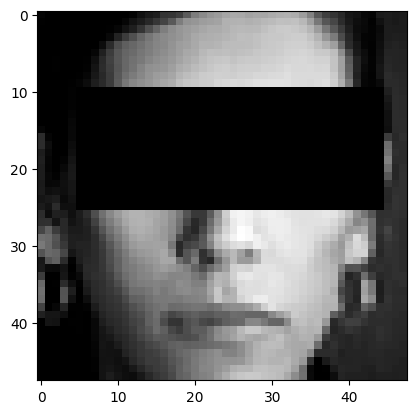

In [ ]:
from matplotlib import pyplot as plt

df_temp = df.copy(deep=True)

df_temp['pixelss']=[[int(y) for y in x.split()] for x in df_temp['pixels']]

z=np.array(df_temp['pixelss'][0])
zz=z.reshape(48,48)
plt.imshow(zz, interpolation='nearest',cmap='gray')
plt.show()

In [ ]:
df

,pixels,emotion,Usage
0,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,6,PrivateTest
1,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,2,PrivateTest
2,255 254 255 254 254 179 122 107 95 124 149 150...,2,PrivateTest
3,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,0,PrivateTest
4,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,3,PrivateTest
...,...,...,...
2004,156 156 156 156 156 153 163 100 16 20 18 17 13...,6,PublicTest
2005,10 10 11 11 13 16 19 19 21 24 57 70 138 166 18...,6,PublicTest
2006,6 6 7 10 10 11 12 13 18 18 20 18 25 33 45 42 3...,6,PublicTest
2007,131 124 119 115 111 106 110 142 177 202 159 17...,6,PublicTest


In [ ]:
df.to_csv("/content/fer2013.csv", index=False)

In [ ]:
!git clone https://github.com/usef-kh/fer.git

Cloning into 'fer'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 66 (delta 4), reused 0 (delta 0), pack-reused 47 (from 1)
Receiving objects: 100% (66/66), 567.63 KiB | 5.25 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
import os
import shutil

# Create the required directory structure within the current working directory
os.makedirs('/content/fer/datasets/fer2013', exist_ok=True)

# Move the uploaded file to the correct location
shutil.move('/content/fer2013.csv', '/content/fer/datasets/fer2013/fer2013.csv')


'/content/fer/datasets/fer2013/fer2013.csv'

In [ ]:
file_path = '/content/fer/data/fer2013.py'

# Deleting the file
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

file_path = '/content/fer/utils/loops.py'

# Deleting the file
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

file_path = '/content/fer/train.py'

# Deleting the file
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

shutil.move('/content/fer2013.py', '/content/fer/data/fer2013.py')
shutil.move('/content/loops.py', '/content/fer/utils/loops.py')
shutil.move('/content/train.py', '/content/fer/train.py')

/content/fer/data/fer2013.py has been deleted.
/content/fer/utils/loops.py has been deleted.
/content/fer/train.py has been deleted.


'/content/fer/train.py'

In [ ]:
%cd /content/fer

/content/fer


In [ ]:
setup_seed(42)
!python train.py network=vgg name=my_vgg_k1 bs=128 lr=0.1 n_epochs=300

Training my_vgg_k1 on cuda:0
Epoch  1		Train Accuracy: 19.5800 %		Val Accuracy: 22.2222 %
Epoch  2		Train Accuracy: 24.0500 %		Val Accuracy: 22.2222 %
Epoch  3		Train Accuracy: 24.5600 %		Val Accuracy: 22.2222 %
Epoch  4		Train Accuracy: 25.8100 %		Val Accuracy: 22.2222 %
Epoch  5		Train Accuracy: 26.6300 %		Val Accuracy: 22.2222 %
Epoch  6		Train Accuracy: 26.3600 %		Val Accuracy: 33.3333 %
Epoch  7		Train Accuracy: 26.3300 %		Val Accuracy: 11.1111 %
Epoch  8		Train Accuracy: 24.9600 %		Val Accuracy: 11.1111 %
Epoch  9		Train Accuracy: 25.2600 %		Val Accuracy: 33.3333 %
Epoch 10		Train Accuracy: 26.3600 %		Val Accuracy: 33.3333 %
Epoch 11		Train Accuracy: 25.9700 %		Val Accuracy: 22.2222 %
Epoch 12		Train Accuracy: 26.4900 %		Val Accuracy: 33.3333 %
Epoch 13		Train Accuracy: 26.9100 %		Val Accuracy: 33.3333 %
Epoch 14		Train Accuracy: 27.3000 %		Val Accuracy: 22.2222 %
Epoch 15		Train Accuracy: 28.6300 %		Val Accuracy: 0.0000 %
Epoch 16		Train Accuracy: 29.0000 %		Val Accuracy: 11.111

In [ ]:
import torch
import torch.nn.functional as F

emotion_mapping = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

df_train=df[df['Usage']=='Training']
df_valid=df[df['Usage']=='PublicTest']

y_train_true_tensor = torch.tensor(df_train['emotion'].values, dtype=torch.long)
y_train_true_one_hot = torch.nn.functional.one_hot(y_train_true_tensor, num_classes=7).float()

y_test_true_tensor = torch.tensor(df_valid['emotion'].values, dtype=torch.long)
y_test_true_one_hot = torch.nn.functional.one_hot(y_test_true_tensor, num_classes=7).float()

df_y_test_pred = pd.read_csv('/content/fer/checkpoints/my_vgg_k1/saved_y_test_pred.csv')

# Function to convert the string representation of lists to actual lists
def convert_to_list(s):
    s = s.replace('[', '').replace(']', '')  # Remove brackets
    return list(map(float, s.split()))

# Apply the function to the 'Output' column
df_y_test_pred['Output'] = df_y_test_pred['Output'].apply(convert_to_list)

# Split the lists into separate columns
df_y_test_pred[['output1', 'output2', 'output3', 'output4', 'output5', 'output6', 'output7']] = pd.DataFrame(df_y_test_pred['Output'].tolist(), index=df_y_test_pred.index)

# Drop the original column with lists
df_y_test_pred = df_y_test_pred.drop(columns=['Output'])

y_test_pred = torch.tensor(df_y_test_pred.values, dtype=torch.float32)

# Apply softmax to convert logits to probabilities
y_test_pred_prob = F.softmax(y_test_pred, dim=1)

# Display the probabilities
print(y_test_pred_prob)
print(y_test_pred_prob.shape)

tensor([[3.0159e-01, 5.2375e-03, 5.5341e-01,  ..., 3.1032e-02, 1.0469e-01,
         2.6754e-03],
        [4.9142e-01, 1.0521e-02, 3.5323e-01,  ..., 1.1452e-01, 2.0538e-02,
         9.6814e-03],
        [6.8032e-01, 2.3671e-02, 8.2910e-02,  ..., 2.0658e-01, 4.6654e-04,
         3.9934e-03],
        ...,
        [2.4064e-02, 7.6922e-03, 1.0971e-02,  ..., 1.2852e-01, 2.1803e-04,
         8.2853e-01],
        [2.3178e-01, 1.0940e-02, 5.3801e-02,  ..., 2.9980e-01, 2.4451e-04,
         4.0343e-01],
        [2.6361e-01, 5.3426e-02, 4.2033e-01,  ..., 1.9294e-01, 3.6450e-02,
         2.8026e-02]])
torch.Size([1000, 7])


In [ ]:
# Path to the CSV file
file_path = '/content/fer/datasets/fer2013/fer2013.csv'

# Deleting the file
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

/content/fer/datasets/fer2013/fer2013.csv has been deleted.


In [ ]:
df1 = df.copy(deep=True)
# Swapping the values in the 'Usage' column
df1['Usage'] = df1['Usage'].replace({'PublicTest': 'Training', 'Training': 'PublicTest'})

df1.to_csv("./fer2013.csv", index=False)

# Move the uploaded file to the correct location
shutil.move('./fer2013.csv', '/content/fer/datasets/fer2013/fer2013.csv')

'/content/fer/datasets/fer2013/fer2013.csv'

In [ ]:
df1

,pixels,emotion,Usage
0,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,6,PrivateTest
1,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,2,PrivateTest
2,255 254 255 254 254 179 122 107 95 124 149 150...,2,PrivateTest
3,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,0,PrivateTest
4,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,3,PrivateTest
...,...,...,...
2004,156 156 156 156 156 153 163 100 16 20 18 17 13...,6,Training
2005,10 10 11 11 13 16 19 19 21 24 57 70 138 166 18...,6,Training
2006,6 6 7 10 10 11 12 13 18 18 20 18 25 33 45 42 3...,6,Training
2007,131 124 119 115 111 106 110 142 177 202 159 17...,6,Training


In [ ]:
# Verify the final counts
print(len(df1[df1['Usage']=='Training']))  # Should be 20000
print(len(df1[df1['Usage']=='PrivateTest']))  # Should be 10
print(len(df1[df1['Usage']=='PublicTest']))  # Should be the rest

1000
9
1000


In [ ]:
setup_seed(42)
!python train.py network=vgg name=my_vgg_k2 bs=128 lr=0.1 n_epochs=300

Training my_vgg_k2 on cuda:0
Epoch  1		Train Accuracy: 21.1200 %		Val Accuracy: 33.3333 %
Epoch  2		Train Accuracy: 25.3600 %		Val Accuracy: 11.1111 %
Epoch  3		Train Accuracy: 25.8400 %		Val Accuracy: 22.2222 %
Epoch  4		Train Accuracy: 25.2100 %		Val Accuracy: 22.2222 %
Epoch  5		Train Accuracy: 26.1100 %		Val Accuracy: 22.2222 %
Epoch  6		Train Accuracy: 25.2900 %		Val Accuracy: 22.2222 %
Epoch  7		Train Accuracy: 26.8600 %		Val Accuracy: 22.2222 %
Epoch  8		Train Accuracy: 26.7400 %		Val Accuracy: 33.3333 %
Epoch  9		Train Accuracy: 26.7500 %		Val Accuracy: 22.2222 %
Epoch 10		Train Accuracy: 25.7400 %		Val Accuracy: 22.2222 %
Epoch 11		Train Accuracy: 26.9000 %		Val Accuracy: 33.3333 %
Epoch 12		Train Accuracy: 26.3400 %		Val Accuracy: 33.3333 %
Epoch 13		Train Accuracy: 27.1700 %		Val Accuracy: 22.2222 %
Epoch 14		Train Accuracy: 27.7200 %		Val Accuracy: 22.2222 %
Epoch 15		Train Accuracy: 27.2400 %		Val Accuracy: 22.2222 %
Epoch 16		Train Accuracy: 27.7600 %		Val Accuracy: 11.11

In [ ]:
df_y_train_pred = pd.read_csv('/content/fer/checkpoints/my_vgg_k2/saved_y_test_pred.csv')


# Apply the function to the 'Output' column
df_y_train_pred['Output'] = df_y_train_pred['Output'].apply(convert_to_list)

# Split the lists into separate columns
df_y_train_pred[['output1', 'output2', 'output3', 'output4', 'output5', 'output6', 'output7']] = pd.DataFrame(df_y_train_pred['Output'].tolist(), index=df_y_train_pred.index)

# Drop the original column with lists
df_y_train_pred = df_y_train_pred.drop(columns=['Output'])

y_train_pred = torch.tensor(df_y_train_pred.values, dtype=torch.float32)

# Apply softmax to convert logits to probabilities
y_train_pred_prob = F.softmax(y_train_pred, dim=1)

# Display the probabilities
print(y_train_pred_prob)
print(y_train_pred_prob.shape)

tensor([[2.0199e-01, 2.6105e-02, 1.3639e-01,  ..., 2.9628e-01, 1.9615e-02,
         3.1940e-01],
        [3.5480e-01, 2.0093e-02, 1.8626e-01,  ..., 2.3210e-01, 4.2077e-03,
         2.0249e-01],
        [6.2585e-02, 1.3046e-03, 1.2318e-01,  ..., 1.0439e-02, 8.0137e-01,
         8.1044e-04],
        ...,
        [5.3652e-02, 8.7128e-03, 3.3554e-02,  ..., 1.7873e-01, 1.5766e-03,
         7.2375e-01],
        [1.6721e-01, 7.3723e-02, 9.5092e-02,  ..., 2.8413e-01, 4.4348e-03,
         2.9591e-01],
        [8.0985e-04, 1.2425e-04, 9.1717e-04,  ..., 1.1906e-03, 3.7765e-05,
         6.0618e-04]])
torch.Size([1000, 7])


# To get GAN

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import pandas as pd
import numpy as np

df=df_ori.copy(deep=True)


df['pixels_covered'] = df['pixels'].apply(lambda x: set_region_to_black(x, regions))
# Verify the final counts
print(len(df[df['Usage']=='Training']))  # Should be 2500
print(len(df[df['Usage']=='PrivateTest']))  # Should be 9
print(len(df[df['Usage']=='PublicTest']))  # Should be 2500

1000
9
1000


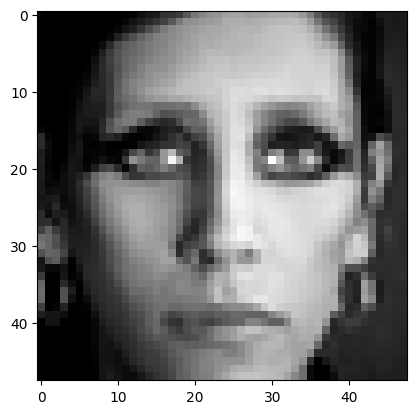

In [ ]:
from matplotlib import pyplot as plt

df_temp = df.copy(deep=True)

df_temp['pixelss']=[[int(y) for y in x.split()] for x in df_temp['pixels']]
df_temp['pixelss_covered']=[[int(y) for y in x.split()] for x in df_temp['pixels_covered']]

z=np.array(df_temp['pixelss'][0])
zz=z.reshape(48,48)
plt.imshow(zz, interpolation='nearest',cmap='gray')
plt.show()

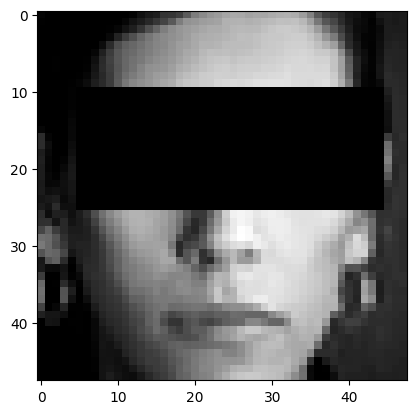

In [ ]:
z=np.array(df_temp['pixelss_covered'][0])
zz=z.reshape(48,48)
plt.imshow(zz, interpolation='nearest',cmap='gray')
plt.show()

In [ ]:
df_train=df_temp[df_temp['Usage']=='Training']
df_valid=df_temp[df_temp['Usage']=='PublicTest']

In [ ]:
df_train['pixelss']

,pixelss
9,"[39, 30, 29, 23, 31, 30, 22, 28, 31, 33, 52, 9..."
10,"[232, 220, 204, 199, 184, 180, 184, 189, 195, ..."
11,"[115, 79, 85, 73, 58, 23, 74, 175, 215, 226, 2..."
12,"[254, 254, 254, 254, 254, 255, 141, 122, 152, ..."
13,"[37, 31, 24, 23, 27, 22, 25, 35, 36, 26, 33, 3..."
...,...
1800,"[243, 240, 235, 231, 228, 228, 225, 227, 224, ..."
1801,"[145, 146, 118, 26, 15, 18, 16, 18, 24, 38, 57..."
1802,"[255, 253, 252, 254, 158, 21, 3, 7, 12, 18, 36..."
1803,"[9, 14, 11, 11, 49, 87, 85, 93, 103, 104, 108,..."


In [ ]:
import torch
# Convert the dataframe column to a list of lists
list_x_train = df_train['pixelss'].tolist()
list_z_train = df_train['pixelss_covered'].tolist()

list_x_test = df_valid['pixelss'].tolist()
list_z_test = df_valid['pixelss_covered'].tolist()
# Convert the list of lists to a PyTorch tensor
tensor_x_train = torch.tensor(list_x_train)
tensor_z_train = torch.tensor(list_z_train)

tensor_x_test = torch.tensor(list_x_test)
tensor_z_test = torch.tensor(list_z_test)

# Reshape the tensor to the desired shape (20000, 1)
tensor_x_train = tensor_x_train.view(1000, -1)
tensor_z_train = tensor_z_train.view(1000, -1)

tensor_x_test = tensor_x_test.view(1000, -1)
tensor_z_test = tensor_z_test.view(1000, -1)

print(tensor_x_train.shape)
print(tensor_z_train.shape)

print(tensor_x_test.shape)
print(tensor_z_test.shape)

torch.Size([1000, 2304])
torch.Size([1000, 2304])
torch.Size([1000, 2304])
torch.Size([1000, 2304])


In [ ]:
x_train = tensor_x_train.view(1000, 1, 48, 48).float()
z_train = tensor_z_train.view(1000, 1, 48, 48).float()

x_test = tensor_x_test.view(1000, 1, 48, 48).float()
z_test = tensor_z_test.view(1000, 1, 48, 48).float()

print(x_train.shape)
print(z_train.shape)

print(x_test.shape)
print(z_test.shape)

torch.Size([1000, 1, 48, 48])
torch.Size([1000, 1, 48, 48])
torch.Size([1000, 1, 48, 48])
torch.Size([1000, 1, 48, 48])


In [ ]:
x_train = x_train.to(device) / 255.0
z_train = z_train.to(device) / 255.0

x_test = x_test.to(device) / 255.0
z_test = z_test.to(device) / 255.0

In [ ]:
x_train[0], z_train[0]

(tensor([[[0.1529, 0.1176, 0.1137,  ..., 0.1216, 0.1137, 0.1922],
          [0.1412, 0.1255, 0.1137,  ..., 0.1608, 0.1098, 0.1490],
          [0.1373, 0.1412, 0.1176,  ..., 0.1333, 0.1294, 0.1216],
          ...,
          [0.0745, 0.2392, 0.3216,  ..., 0.5020, 0.6235, 0.6627],
          [0.1255, 0.3451, 0.3373,  ..., 0.5647, 0.6549, 0.6667],
          [0.2549, 0.3804, 0.3412,  ..., 0.6235, 0.6353, 0.6549]]],
        device='cuda:0'),
 tensor([[[0.1529, 0.1176, 0.1137,  ..., 0.1216, 0.1137, 0.1922],
          [0.1412, 0.1255, 0.1137,  ..., 0.1608, 0.1098, 0.1490],
          [0.1373, 0.1412, 0.1176,  ..., 0.1333, 0.1294, 0.1216],
          ...,
          [0.0745, 0.2392, 0.3216,  ..., 0.5020, 0.6235, 0.6627],
          [0.1255, 0.3451, 0.3373,  ..., 0.5647, 0.6549, 0.6667],
          [0.2549, 0.3804, 0.3412,  ..., 0.6235, 0.6353, 0.6549]]],
        device='cuda:0'))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.distributions as TD
import numpy as np
import random
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import cv2
import matplotlib.pyplot as plt

def get_p_value_stat(boot_num, M, n, gen_x_all_torch, gen_y_all_torch, x_torch, y_torch, z_torch, boor_rv_type="gaussian", sigma_w=1.0, sigma_u=1.0):

    d_y = y_torch.shape[1]
    d_x = x_torch.shape[1]

    w_mx = torch.exp(-get_distance_matrix(z_torch, z_torch) / sigma_w)
    u_mx_1 = torch.exp(-get_distance_matrix(x_torch, x_torch) / sigma_u)
    u_mx_2 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], x_torch) / sigma_u)
    for i in range(1, M):
        u_mx_2 = u_mx_2 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], x_torch) / sigma_u)
    u_mx_2 = u_mx_2 / M

    u_mx_3 = u_mx_2.T
    u_mx_4 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], gen_x_all_torch[:,0,:]) / sigma_u)
    for i in range(1, M):
        u_mx_4 = u_mx_4 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], gen_x_all_torch[:,i,:]) / sigma_u)
    u_mx_4 = u_mx_4 / M

    u_mx = u_mx_1 - u_mx_2 - u_mx_3 + u_mx_4
    v_mx_temp = (gen_y_all_torch - y_torch)
    v_mx = torch.matmul(v_mx_temp, v_mx_temp.T)
    FF_mx = u_mx * v_mx * w_mx * (1 - torch.eye(n).to(device))

    stat = 1 / (n - 1) * torch.sum(FF_mx).item()

    boottemp = np.array([])
    if boor_rv_type == "rademacher":
        eboot = torch.sign(torch.randn(n, boot_num)).to(device)
    elif boor_rv_type == "gaussian":
        eboot = torch.randn(n, boot_num).to(device)
    for bb in range(boot_num):
        random_mx = torch.matmul(eboot[:, bb].reshape(-1, 1), eboot[:, bb].reshape(-1, 1).T)
        bootmatrix = FF_mx * random_mx
        stat_boot = 1 / (n - 1) * torch.sum(bootmatrix).item()
        boottemp = np.append(boottemp, stat_boot)
    return stat, boottemp

# Function to save images from tensor
def save_images_from_tensor(tensor, file_path):
    # Convert tensor to numpy array
    np_images = tensor.numpy()

    # Create a figure with a larger size
    plt.figure(figsize=(20, 10))  # Adjust the size as needed

    # Plot each image
    for i in range(np_images.shape[0]):
        image = np_images[i]
        image = image.transpose(1, 2, 0)  # Change shape from (1, 48, 48) to (48, 48, 1)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Uncomment if needed

        plt.subplot(4, 8, i + 1)
        plt.imshow(image, cmap='gray')  # Use 'gray' if the images are grayscale
        plt.axis('off')

    # Save the figure to a file
    plt.savefig(file_path)
    plt.close()

def sample_noise(sample_size, noise_dimension, noise_type, input_var):

    if (noise_type == "normal"):
      noise_generator = TD.MultivariateNormal(
        torch.zeros(noise_dimension).to(device), input_var * torch.eye(noise_dimension).to(device))

      Z = noise_generator.sample((sample_size,))
    if (noise_type == "unif"):
      Z = torch.rand(sample_size, noise_dimension)
    if (noise_type == "Cauchy"):
      Z = TD.Cauchy(torch.tensor([0.0]), torch.tensor([1.0])).sample((sample_size, noise_dimension)).squeeze(2)

    return Z

def get_distance_matrix(X, Y, p_in = 1):
    return torch.cdist(X, Y, p=p_in)

def find_loss_l(y_torch, gen_y_all_torch, z_torch, sigma_w, sigma_u, M):
    n = z_torch.shape[0]
    d_y = y_torch.shape[1]

    w_mx = get_distance_matrix(z_torch, z_torch)
    w_mx = torch.exp(-w_mx / sigma_w)

    u_mx_1 = torch.exp(-get_distance_matrix(y_torch, y_torch) / sigma_u)
    u_mx_2 = torch.exp(-get_distance_matrix(gen_y_all_torch[:,0,:], y_torch) / sigma_u)
    for i in range(1, M):
        u_mx_2 = u_mx_2 + torch.exp(-get_distance_matrix(gen_y_all_torch[:,i,:], y_torch) / sigma_u)
    u_mx_2 = u_mx_2 / M
    u_mx_3 = u_mx_2.T
    u_mx_4 = torch.exp(-get_distance_matrix(gen_y_all_torch[:,0,:], gen_y_all_torch[:,0,:]) / sigma_u)
    for i in range(1, M):
        u_mx_4 = u_mx_4 + torch.exp(-get_distance_matrix(gen_y_all_torch[:,i,:], gen_y_all_torch[:,i,:]) / sigma_u)
    u_mx_4 = u_mx_4 / M

    u_mx = u_mx_1 - u_mx_2 - u_mx_3 + u_mx_4


    FF_mx = u_mx * w_mx * (1 - torch.eye(n).to(device))

    loss = 1 / (n) * torch.sum(FF_mx)
    return loss


def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True

class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


# Define the Trim class
class Trim(nn.Module):
    def __init__(self, width, height):
        super().__init__()
        self.width = width
        self.height = height

    def forward(self, x):
        return x[:, :, :self.height, :self.width]

class Conv2dResize(nn.Module):
    def __init__(self, region_height, region_width):
        super(Conv2dResize, self).__init__()
        self.region_height = region_height
        self.region_width = region_width
        self.conv = nn.Conv2d(1, 1, kernel_size=3, stride=2, padding=1)  # Example parameters

    def forward(self, x):
        x = self.conv(x)
        x = nn.functional.interpolate(x, size=(self.region_height, self.region_width), mode='bilinear', align_corners=False)
        return x

class Model(nn.Module):
    def __init__(self, noise_dim=50, regions=regions):
        super(Model, self).__init__()
        self.noise_dim = noise_dim

        self.region1 = regions[0]
        self.region1_height = self.region1[1] - self.region1[0]
        self.region1_width = self.region1[3] - self.region1[2]

        self.fc_noise = nn.Sequential(
            nn.Linear(self.noise_dim, 48*48),
            nn.ReLU(inplace=True)
        )

        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(2, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),  # (2 * 48 * 48) to (128 * 48 * 48)
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            # nn.AvgPool2d(4),  # Downsample to (128 * 12 * 12)
            # nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False),  # Upsample back to (128 * 48 * 48)
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(inplace=True)
        )
        # self.enc2 = nn.Sequential(
        #     nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),# (128 * 48 * 48) to (256 * 48 * 48)
        #     nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
        #     nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True),
        #     # nn.AvgPool2d(4),  # Downsample to (256 * 12 * 12)
        #     # nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False),  # Upsample back to (256 * 48 * 48)
        #     nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(inplace=True)
        # )

        self.final_conv2 = nn.Sequential(nn.Conv2d(128, 1, kernel_size=3, padding=1), nn.Sigmoid()) # (128 * 48 * 48) to (1 * 48 * 48)


    def forward(self, x, noise):
        noise = self.fc_noise(noise)
        noise = noise.view(-1, 1, 48, 48)
        x = torch.cat((x, noise), dim=1) # it should be (2 * 48 * 48)
        # Encoder
        enc1 = self.enc1(x)
        # enc2 = self.enc2(enc1)

        final_output2 = self.final_conv2(enc1)
        return final_output2

    def get_full_image_old(self, x, noise):
        x_temp = x.clone()
        output = self.forward(x_temp, noise)
        return output

    def get_full_image(self, x, noise):
        x_temp = x.clone()
        output = self.forward(x_temp, noise)
        x_temp[:,:,self.region1[0]:self.region1[1],self.region1[2]:self.region1[3]] = output[:,:,self.region1[0]:self.region1[1],self.region1[2]:self.region1[3]]
        return x_temp


def generate_array(k, n1, n):
    if k == 0:
        return np.arange(n1)
    elif k == 1:
        return np.arange(n1, n)
    else:
        raise ValueError("Invalid input: k must be 0 or 1")

def get_test_loss_train_x(z_train, z_test, x_train, x_test, param, regions=regions):


    set_seed = param['set_seed']
    noise_dimension = param['noise_dimension']
    noise_type = param['noise_type']
    input_var = param['input_var']
    lambda_3 = param['lambda_3']
    wgt_decay = param['wgt_decay']
    G_lr = param['G_lr']

    setup_seed(set_seed)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Loading a Pretrained ResNet-18 Model:
    model = Model(noise_dim=noise_dimension, regions=regions).to(device)
    optimizer = optim.Adam(model.parameters(), lr=G_lr, weight_decay=wgt_decay)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

    N = z_train.shape[0]

    z_temp = z_train.clone().reshape(N, -1).to(device)
    z_temp = z_temp.detach()
    w_mx = get_distance_matrix(z_temp, z_temp)
    sigma_z_l = torch.median(w_mx).item()


    x_sub_all_temp = x_train.clone().reshape(N, -1).to(device)

    x_sub_all_temp = x_sub_all_temp.detach()
    u_mx = get_distance_matrix(x_sub_all_temp, x_sub_all_temp)
    sigma_x_l = torch.median(u_mx).item()

    print("sigma_z_l: ", sigma_z_l, "sigma_x_l: ", sigma_x_l)

    M_train = 10
    batch_size = 64
    epochs_num = 300

    train_data = Data.TensorDataset(z_train, x_train)
    train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

    test_data = Data.TensorDataset(z_test, x_test)
    test_loader = Data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

    # eval
    total_test_loss = 0.0
    batch_count = 0

    model.eval()
    with torch.no_grad():
        for batch_z, batch_x in test_loader:
            batch_count += 1
            batch_size = batch_z.shape[0]

            batch_x_sub = batch_x.clone()

            X_real = batch_x_sub

            repeat_dims = (M_train, 1, 1, 1)
            Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

            Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

            output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
            output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

            X_fake = output1.reshape(batch_size, M_train, -1).to(device)
            X_real = X_real.reshape(batch_size, -1).to(device)
            Z_real = batch_z.reshape(batch_size, -1).to(device)

            mmd_l_test_loss = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train)
            total_test_loss = total_test_loss +  mmd_l_test_loss.item()

    avg_test_loss = total_test_loss / batch_count

    total_train_loss = 0.0
    batch_count = 0

    model.eval()
    with torch.no_grad():
        for batch_z, batch_x in train_loader:
            batch_count += 1
            batch_size = batch_z.shape[0]

            batch_x_sub = batch_x.clone()

            X_real = batch_x_sub

            repeat_dims = (M_train, 1, 1, 1)
            Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

            Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

            output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
            output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

            X_fake = output1.reshape(batch_size, M_train, -1).to(device)
            X_real = X_real.reshape(batch_size, -1).to(device)
            Z_real = batch_z.reshape(batch_size, -1).to(device)

            mmd_l_train_loss = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train)
            total_train_loss = total_train_loss +  mmd_l_train_loss.item()

    avg_train_loss = total_train_loss / batch_count

    print('Epoch: 0 | train loss: %.4f' % avg_train_loss, '| valid loss: %.4f' % avg_test_loss)


    for epoch in tqdm(range(epochs_num)):
        model.train()
        total_train_loss = 0.0
        batch_count = 0
        for batch_z, batch_x in train_loader:
            batch_count += 1
            batch_size = batch_z.shape[0]

            batch_x_sub = batch_x.clone()

            X_real = batch_x_sub

            repeat_dims = (M_train, 1, 1, 1)
            Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

            Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

            output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
            output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

            X_fake = output1.reshape(batch_size, M_train, -1).to(device)
            X_real = X_real.reshape(batch_size, -1).to(device)
            Z_real = batch_z.reshape(batch_size, -1).to(device)

            # Generator step
            g_zx_error = None
            optimizer.zero_grad()

            l1_regularization = 0

            for param in model.parameters():
                l1_regularization += torch.linalg.vector_norm(param, ord = 1)

            g_zx_error = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train) + \
                    lambda_3 * l1_regularization

            g_zx_error.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            optimizer.step()
            total_train_loss = total_train_loss +   g_zx_error.item()

        scheduler.step()
        train_avg_loss = total_train_loss / batch_count

        if (epoch + 1) % 5 == 0:

            # eval
            total_loss = 0.0
            batch_count = 0

            model.eval()
            with torch.no_grad():
                for batch_z, batch_x in test_loader:
                    batch_count += 1
                    batch_size = batch_z.shape[0]

                    batch_x_sub = batch_x.clone()

                    X_real = batch_x_sub

                    repeat_dims = (M_train, 1, 1, 1)
                    Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

                    Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

                    output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
                    output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

                    X_fake = output1.reshape(batch_size, M_train, -1).to(device)
                    X_real = X_real.reshape(batch_size, -1).to(device)
                    Z_real = batch_z.reshape(batch_size, -1).to(device)

                    mmd_l_test_loss = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train)
                    total_loss = total_loss +  mmd_l_test_loss.item()

            avg_loss = total_loss / batch_count

            print('Epoch: ', epoch + 1, '| train loss: %.4f' % train_avg_loss, '| valid loss: %.4f' % avg_loss)

            # To see the image during the training process

            z_demo = z_test[:32,:,:,:].clone()
            x_demo = x_test[:32,:,:,:].clone()


            Noise_fake = sample_noise(z_demo.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

            model.eval()
            with torch.no_grad():
                z_demo_temp = model.get_full_image(z_demo.to(device), Noise_fake.to(device))


            save_images_from_tensor(z_demo_temp.cpu().detach(), './generated_image.jpg')
            save_images_from_tensor(x_demo.cpu().detach(), './original_image.jpg')
            save_images_from_tensor(z_demo.cpu().detach(), './covered_image.jpg')

        # final eval
        total_loss = 0.0
        batch_count = 0

        model.eval()
        with torch.no_grad():
            for batch_z, batch_x in test_loader:
                batch_count += 1
                batch_size = batch_z.shape[0]

                batch_x_sub = batch_x.clone()

                X_real = batch_x_sub

                repeat_dims = (M_train, 1, 1, 1)
                Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

                Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

                output1= model(Z_real_repeat.to(device), Noise_fake.to(device))
                output1 = output1.reshape(M_train, batch_size, output1.shape[1], output1.shape[2], output1.shape[3]).swapaxes(0, 1)

                X_fake = output1.reshape(batch_size, M_train, -1).to(device)
                X_real = X_real.reshape(batch_size, -1).to(device)
                Z_real = batch_z.reshape(batch_size, -1).to(device)

                mmd_l_test_loss = find_loss_l(X_real, X_fake, Z_real, sigma_z_l, sigma_x_l, M_train)
                total_loss = total_loss +  mmd_l_test_loss.item()

        avg_loss = total_loss / batch_count

    return avg_loss, model


In [ ]:
param = {
  "set_seed": 42,
  "noise_dimension": 48*48,
  "noise_type": "normal",
  "input_var": 1.0/10.0,
  "lambda_3": 1e-5,
  "wgt_decay": 1e-05,
  "G_lr": 1e-3
}

val_loss_k1, model_k1 = get_test_loss_train_x(z_train=z_train, z_test=z_test, x_train=x_train, x_test=x_test, param=param, regions=regions)
print("val_loss_k1: ", val_loss_k1)

sigma_z_l:  441.803955078125 sigma_x_l:  585.7294921875
Epoch: 0 | train loss: 10.7908 | valid loss: 10.9102


  1%|▏         | 4/300 [00:10<12:21,  2.51s/it]

Epoch:  5 | train loss: 1.5563 | valid loss: 0.4800


  3%|▎         | 9/300 [00:24<12:40,  2.61s/it]

Epoch:  10 | train loss: 0.6985 | valid loss: 0.3784


  5%|▍         | 14/300 [00:38<12:29,  2.62s/it]

Epoch:  15 | train loss: 0.5856 | valid loss: 0.1971


  6%|▋         | 19/300 [00:53<12:13,  2.61s/it]

Epoch:  20 | train loss: 0.4499 | valid loss: 0.1253


  8%|▊         | 24/300 [01:07<11:51,  2.58s/it]

Epoch:  25 | train loss: 0.4234 | valid loss: 0.1339


 10%|▉         | 29/300 [01:21<11:49,  2.62s/it]

Epoch:  30 | train loss: 0.4281 | valid loss: 0.1318


 11%|█▏        | 34/300 [01:35<11:28,  2.59s/it]

Epoch:  35 | train loss: 0.3968 | valid loss: 0.1103


 13%|█▎        | 39/300 [01:49<11:25,  2.63s/it]

Epoch:  40 | train loss: 0.4234 | valid loss: 0.1201


 15%|█▍        | 44/300 [02:03<11:05,  2.60s/it]

Epoch:  45 | train loss: 0.3857 | valid loss: 0.0745


 16%|█▋        | 49/300 [02:18<10:57,  2.62s/it]

Epoch:  50 | train loss: 0.3872 | valid loss: 0.1195


 18%|█▊        | 54/300 [02:32<10:35,  2.58s/it]

Epoch:  55 | train loss: 0.3259 | valid loss: 0.0770


 20%|█▉        | 59/300 [02:46<10:22,  2.58s/it]

Epoch:  60 | train loss: 0.3462 | valid loss: 0.0911


 21%|██▏       | 64/300 [03:00<10:21,  2.63s/it]

Epoch:  65 | train loss: 0.3505 | valid loss: 0.0952


 23%|██▎       | 69/300 [03:14<09:58,  2.59s/it]

Epoch:  70 | train loss: 0.3443 | valid loss: 0.1106


 25%|██▍       | 74/300 [03:28<09:42,  2.58s/it]

Epoch:  75 | train loss: 0.3579 | valid loss: 0.0878


 26%|██▋       | 79/300 [03:43<09:45,  2.65s/it]

Epoch:  80 | train loss: 0.3771 | valid loss: 0.0632


 28%|██▊       | 84/300 [03:57<09:19,  2.59s/it]

Epoch:  85 | train loss: 0.3377 | valid loss: 0.0779


 30%|██▉       | 89/300 [04:11<09:03,  2.58s/it]

Epoch:  90 | train loss: 0.3200 | valid loss: 0.0537


 31%|███▏      | 94/300 [04:25<08:50,  2.57s/it]

Epoch:  95 | train loss: 0.3638 | valid loss: 0.0648


 33%|███▎      | 99/300 [04:40<08:53,  2.65s/it]

Epoch:  100 | train loss: 0.3023 | valid loss: 0.0515


 35%|███▍      | 104/300 [04:54<08:28,  2.59s/it]

Epoch:  105 | train loss: 0.2268 | valid loss: 0.0440


 36%|███▋      | 109/300 [05:08<08:14,  2.59s/it]

Epoch:  110 | train loss: 0.1910 | valid loss: 0.0470


 38%|███▊      | 114/300 [05:22<08:00,  2.58s/it]

Epoch:  115 | train loss: 0.1684 | valid loss: 0.0477


 40%|███▉      | 119/300 [05:35<07:46,  2.58s/it]

Epoch:  120 | train loss: 0.1583 | valid loss: 0.0478


 41%|████▏     | 124/300 [05:49<07:35,  2.59s/it]

Epoch:  125 | train loss: 0.1476 | valid loss: 0.0477


 43%|████▎     | 129/300 [06:05<07:39,  2.69s/it]

Epoch:  130 | train loss: 0.1348 | valid loss: 0.0437


 45%|████▍     | 134/300 [06:19<07:11,  2.60s/it]

Epoch:  135 | train loss: 0.1373 | valid loss: 0.0429


 46%|████▋     | 139/300 [06:33<06:56,  2.59s/it]

Epoch:  140 | train loss: 0.1287 | valid loss: 0.0431


 48%|████▊     | 144/300 [06:47<06:44,  2.60s/it]

Epoch:  145 | train loss: 0.1265 | valid loss: 0.0453


 50%|████▉     | 149/300 [07:00<06:29,  2.58s/it]

Epoch:  150 | train loss: 0.1243 | valid loss: 0.0436


 51%|█████▏    | 154/300 [07:14<06:16,  2.58s/it]

Epoch:  155 | train loss: 0.1219 | valid loss: 0.0411


 53%|█████▎    | 159/300 [07:28<06:03,  2.58s/it]

Epoch:  160 | train loss: 0.1214 | valid loss: 0.0405


 55%|█████▍    | 164/300 [07:44<06:08,  2.71s/it]

Epoch:  165 | train loss: 0.1255 | valid loss: 0.0468


 56%|█████▋    | 169/300 [07:58<05:40,  2.60s/it]

Epoch:  170 | train loss: 0.1177 | valid loss: 0.0407


 58%|█████▊    | 174/300 [08:12<05:24,  2.58s/it]

Epoch:  175 | train loss: 0.1144 | valid loss: 0.0381


 60%|█████▉    | 179/300 [08:26<05:12,  2.58s/it]

Epoch:  180 | train loss: 0.1123 | valid loss: 0.0407


 61%|██████▏   | 184/300 [08:40<04:59,  2.58s/it]

Epoch:  185 | train loss: 0.1107 | valid loss: 0.0407


 63%|██████▎   | 189/300 [08:54<04:46,  2.58s/it]

Epoch:  190 | train loss: 0.1044 | valid loss: 0.0362


 65%|██████▍   | 194/300 [09:08<04:33,  2.58s/it]

Epoch:  195 | train loss: 0.1102 | valid loss: 0.0410


 66%|██████▋   | 199/300 [09:22<04:21,  2.59s/it]

Epoch:  200 | train loss: 0.1044 | valid loss: 0.0373


 68%|██████▊   | 204/300 [09:37<04:22,  2.73s/it]

Epoch:  205 | train loss: 0.1045 | valid loss: 0.0370


 70%|██████▉   | 209/300 [09:51<03:57,  2.61s/it]

Epoch:  210 | train loss: 0.0999 | valid loss: 0.0410


 71%|███████▏  | 214/300 [10:05<03:42,  2.58s/it]

Epoch:  215 | train loss: 0.0991 | valid loss: 0.0373


 73%|███████▎  | 219/300 [10:19<03:30,  2.59s/it]

Epoch:  220 | train loss: 0.0896 | valid loss: 0.0353


 75%|███████▍  | 224/300 [10:33<03:16,  2.59s/it]

Epoch:  225 | train loss: 0.0922 | valid loss: 0.0366


 76%|███████▋  | 229/300 [10:47<03:03,  2.58s/it]

Epoch:  230 | train loss: 0.0920 | valid loss: 0.0391


 78%|███████▊  | 234/300 [11:01<02:50,  2.58s/it]

Epoch:  235 | train loss: 0.0906 | valid loss: 0.0402


 80%|███████▉  | 239/300 [11:15<02:38,  2.59s/it]

Epoch:  240 | train loss: 0.0914 | valid loss: 0.0399


 81%|████████▏ | 244/300 [11:29<02:24,  2.58s/it]

Epoch:  245 | train loss: 0.0888 | valid loss: 0.0359


 83%|████████▎ | 249/300 [11:43<02:11,  2.57s/it]

Epoch:  250 | train loss: 0.0845 | valid loss: 0.0384


 85%|████████▍ | 254/300 [11:57<01:58,  2.58s/it]

Epoch:  255 | train loss: 0.0891 | valid loss: 0.0394


 86%|████████▋ | 259/300 [12:13<01:53,  2.76s/it]

Epoch:  260 | train loss: 0.0881 | valid loss: 0.0395


 88%|████████▊ | 264/300 [12:27<01:34,  2.62s/it]

Epoch:  265 | train loss: 0.0886 | valid loss: 0.0374


 90%|████████▉ | 269/300 [12:41<01:20,  2.59s/it]

Epoch:  270 | train loss: 0.0853 | valid loss: 0.0396


 91%|█████████▏| 274/300 [12:55<01:07,  2.59s/it]

Epoch:  275 | train loss: 0.0867 | valid loss: 0.0386


 93%|█████████▎| 279/300 [13:09<00:54,  2.58s/it]

Epoch:  280 | train loss: 0.0856 | valid loss: 0.0367


 95%|█████████▍| 284/300 [13:23<00:41,  2.59s/it]

Epoch:  285 | train loss: 0.0823 | valid loss: 0.0393


 96%|█████████▋| 289/300 [13:37<00:28,  2.58s/it]

Epoch:  290 | train loss: 0.0836 | valid loss: 0.0371


 98%|█████████▊| 294/300 [13:51<00:15,  2.59s/it]

Epoch:  295 | train loss: 0.0841 | valid loss: 0.0397


100%|█████████▉| 299/300 [14:05<00:02,  2.58s/it]

Epoch:  300 | train loss: 0.0813 | valid loss: 0.0362


100%|██████████| 300/300 [14:09<00:00,  2.83s/it]

val_loss_k1:  0.037150838994421065


In [ ]:
val_loss_k2, model_k2 = get_test_loss_train_x(z_train=z_test, z_test=z_train, x_train=x_test, x_test=x_train, param=param, regions=regions)
print("val_loss_k2: ", val_loss_k2)

sigma_z_l:  438.09808349609375 sigma_x_l:  579.7451782226562
Epoch: 0 | train loss: 10.8837 | valid loss: 10.7874


  1%|▏         | 4/300 [00:09<11:58,  2.43s/it]

Epoch:  5 | train loss: 0.6583 | valid loss: 0.2120


  3%|▎         | 9/300 [00:23<12:27,  2.57s/it]

Epoch:  10 | train loss: 0.3956 | valid loss: 0.1258


  5%|▍         | 14/300 [00:37<12:15,  2.57s/it]

Epoch:  15 | train loss: 0.4272 | valid loss: 0.1909


  6%|▋         | 19/300 [00:51<12:08,  2.59s/it]

Epoch:  20 | train loss: 0.3904 | valid loss: 0.1155


  8%|▊         | 24/300 [01:12<14:10,  3.08s/it]

Epoch:  25 | train loss: 0.3476 | valid loss: 0.1130


 10%|▉         | 29/300 [01:26<12:08,  2.69s/it]

Epoch:  30 | train loss: 0.3732 | valid loss: 0.1055


 11%|█▏        | 34/300 [01:40<11:29,  2.59s/it]

Epoch:  35 | train loss: 0.3393 | valid loss: 0.0908


 13%|█▎        | 39/300 [01:55<11:23,  2.62s/it]

Epoch:  40 | train loss: 0.3541 | valid loss: 0.0671


 15%|█▍        | 44/300 [02:08<11:01,  2.58s/it]

Epoch:  45 | train loss: 0.3227 | valid loss: 0.0911


 16%|█▋        | 49/300 [02:23<10:58,  2.62s/it]

Epoch:  50 | train loss: 0.3172 | valid loss: 0.0572


 18%|█▊        | 54/300 [02:37<10:34,  2.58s/it]

Epoch:  55 | train loss: 0.3244 | valid loss: 0.0650


 20%|█▉        | 59/300 [02:51<10:23,  2.59s/it]

Epoch:  60 | train loss: 0.3376 | valid loss: 0.1052


 21%|██▏       | 64/300 [03:05<10:20,  2.63s/it]

Epoch:  65 | train loss: 0.3380 | valid loss: 0.0720


 23%|██▎       | 69/300 [03:19<09:57,  2.59s/it]

Epoch:  70 | train loss: 0.2846 | valid loss: 0.0651


 25%|██▍       | 74/300 [03:33<09:42,  2.58s/it]

Epoch:  75 | train loss: 0.2828 | valid loss: 0.0956


 26%|██▋       | 79/300 [03:47<09:29,  2.58s/it]

Epoch:  80 | train loss: 0.2833 | valid loss: 0.0695


 28%|██▊       | 84/300 [04:02<09:32,  2.65s/it]

Epoch:  85 | train loss: 0.3098 | valid loss: 0.0571


 30%|██▉       | 89/300 [04:16<09:05,  2.59s/it]

Epoch:  90 | train loss: 0.2967 | valid loss: 0.0512


 31%|███▏      | 94/300 [04:30<08:51,  2.58s/it]

Epoch:  95 | train loss: 0.2795 | valid loss: 0.0446


 33%|███▎      | 99/300 [04:44<08:37,  2.58s/it]

Epoch:  100 | train loss: 0.2724 | valid loss: 0.0511


 35%|███▍      | 104/300 [04:59<08:41,  2.66s/it]

Epoch:  105 | train loss: 0.1916 | valid loss: 0.0496


 36%|███▋      | 109/300 [05:13<08:13,  2.59s/it]

Epoch:  110 | train loss: 0.1712 | valid loss: 0.0458


 38%|███▊      | 114/300 [05:27<07:59,  2.58s/it]

Epoch:  115 | train loss: 0.1513 | valid loss: 0.0449


 40%|███▉      | 119/300 [05:40<07:45,  2.57s/it]

Epoch:  120 | train loss: 0.1396 | valid loss: 0.0435


 41%|████▏     | 124/300 [05:54<07:34,  2.58s/it]

Epoch:  125 | train loss: 0.1352 | valid loss: 0.0419


 43%|████▎     | 129/300 [06:08<07:19,  2.57s/it]

Epoch:  130 | train loss: 0.1227 | valid loss: 0.0380


 45%|████▍     | 134/300 [06:24<07:24,  2.68s/it]

Epoch:  135 | train loss: 0.1209 | valid loss: 0.0414


 46%|████▋     | 139/300 [06:37<06:57,  2.59s/it]

Epoch:  140 | train loss: 0.1161 | valid loss: 0.0401


 48%|████▊     | 144/300 [06:51<06:41,  2.57s/it]

Epoch:  145 | train loss: 0.1140 | valid loss: 0.0418


 50%|████▉     | 149/300 [07:05<06:29,  2.58s/it]

Epoch:  150 | train loss: 0.1101 | valid loss: 0.0399


 51%|█████▏    | 154/300 [07:19<06:16,  2.58s/it]

Epoch:  155 | train loss: 0.1084 | valid loss: 0.0414


 53%|█████▎    | 159/300 [07:33<06:02,  2.57s/it]

Epoch:  160 | train loss: 0.1080 | valid loss: 0.0441


 55%|█████▍    | 164/300 [07:47<05:50,  2.58s/it]

Epoch:  165 | train loss: 0.1062 | valid loss: 0.0400


 56%|█████▋    | 169/300 [08:03<05:53,  2.70s/it]

Epoch:  170 | train loss: 0.1044 | valid loss: 0.0400


 58%|█████▊    | 174/300 [08:16<05:26,  2.59s/it]

Epoch:  175 | train loss: 0.1043 | valid loss: 0.0402


 60%|█████▉    | 179/300 [08:30<05:12,  2.58s/it]

Epoch:  180 | train loss: 0.1015 | valid loss: 0.0369


 61%|██████▏   | 184/300 [08:44<04:59,  2.59s/it]

Epoch:  185 | train loss: 0.0955 | valid loss: 0.0404


 63%|██████▎   | 189/300 [08:58<04:45,  2.57s/it]

Epoch:  190 | train loss: 0.1000 | valid loss: 0.0434


 65%|██████▍   | 194/300 [09:12<04:33,  2.58s/it]

Epoch:  195 | train loss: 0.0998 | valid loss: 0.0368


 66%|██████▋   | 199/300 [09:26<04:19,  2.57s/it]

Epoch:  200 | train loss: 0.0933 | valid loss: 0.0374


 68%|██████▊   | 204/300 [09:40<04:06,  2.57s/it]

Epoch:  205 | train loss: 0.0926 | valid loss: 0.0369


 70%|██████▉   | 209/300 [09:56<04:08,  2.73s/it]

Epoch:  210 | train loss: 0.0927 | valid loss: 0.0388


 71%|███████▏  | 214/300 [10:10<03:43,  2.60s/it]

Epoch:  215 | train loss: 0.0871 | valid loss: 0.0365


 73%|███████▎  | 219/300 [10:24<03:28,  2.58s/it]

Epoch:  220 | train loss: 0.0858 | valid loss: 0.0419


 75%|███████▍  | 224/300 [10:38<03:15,  2.58s/it]

Epoch:  225 | train loss: 0.0870 | valid loss: 0.0369


 76%|███████▋  | 229/300 [10:52<03:02,  2.57s/it]

Epoch:  230 | train loss: 0.0839 | valid loss: 0.0368


 78%|███████▊  | 234/300 [11:06<02:50,  2.58s/it]

Epoch:  235 | train loss: 0.0868 | valid loss: 0.0346


 80%|███████▉  | 239/300 [11:19<02:37,  2.58s/it]

Epoch:  240 | train loss: 0.0891 | valid loss: 0.0352


 81%|████████▏ | 244/300 [11:33<02:24,  2.57s/it]

Epoch:  245 | train loss: 0.0882 | valid loss: 0.0343


 83%|████████▎ | 249/300 [11:47<02:11,  2.58s/it]

Epoch:  250 | train loss: 0.0846 | valid loss: 0.0401


 85%|████████▍ | 254/300 [12:01<01:58,  2.57s/it]

Epoch:  255 | train loss: 0.0852 | valid loss: 0.0380


 86%|████████▋ | 259/300 [12:15<01:45,  2.57s/it]

Epoch:  260 | train loss: 0.0840 | valid loss: 0.0363


 88%|████████▊ | 264/300 [12:32<01:39,  2.77s/it]

Epoch:  265 | train loss: 0.0844 | valid loss: 0.0384


 90%|████████▉ | 269/300 [12:46<01:20,  2.61s/it]

Epoch:  270 | train loss: 0.0815 | valid loss: 0.0383


 91%|█████████▏| 274/300 [12:59<01:07,  2.58s/it]

Epoch:  275 | train loss: 0.0841 | valid loss: 0.0355


 93%|█████████▎| 279/300 [13:13<00:54,  2.58s/it]

Epoch:  280 | train loss: 0.0821 | valid loss: 0.0393


 95%|█████████▍| 284/300 [13:27<00:41,  2.58s/it]

Epoch:  285 | train loss: 0.0841 | valid loss: 0.0372


 96%|█████████▋| 289/300 [13:41<00:28,  2.59s/it]

Epoch:  290 | train loss: 0.0839 | valid loss: 0.0351


 98%|█████████▊| 294/300 [13:55<00:15,  2.59s/it]

Epoch:  295 | train loss: 0.0841 | valid loss: 0.0368


100%|█████████▉| 299/300 [14:09<00:02,  2.59s/it]

Epoch:  300 | train loss: 0.0852 | valid loss: 0.0352


100%|██████████| 300/300 [14:13<00:00,  2.85s/it]

val_loss_k2:  0.040463411656674


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to plot images from tensor
def plot_images_from_tensor(tensor):
    # Convert tensor to numpy array
    np_images = tensor.numpy()

    # Create a figure with a larger size
    plt.figure(figsize=(20, 10))  # Adjust the size as needed

    # Plot each image
    for i in range(np_images.shape[0]):
        image = np_images[i]
        image = image.transpose(1, 2, 0)  # Change shape from (1, 48, 48) to (48, 48, 1)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Uncomment if needed

        plt.subplot(4, 8, i + 1)
        plt.imshow(image, cmap='gray')  # Use 'gray' if the images are grayscale
        plt.axis('off')

    plt.show()

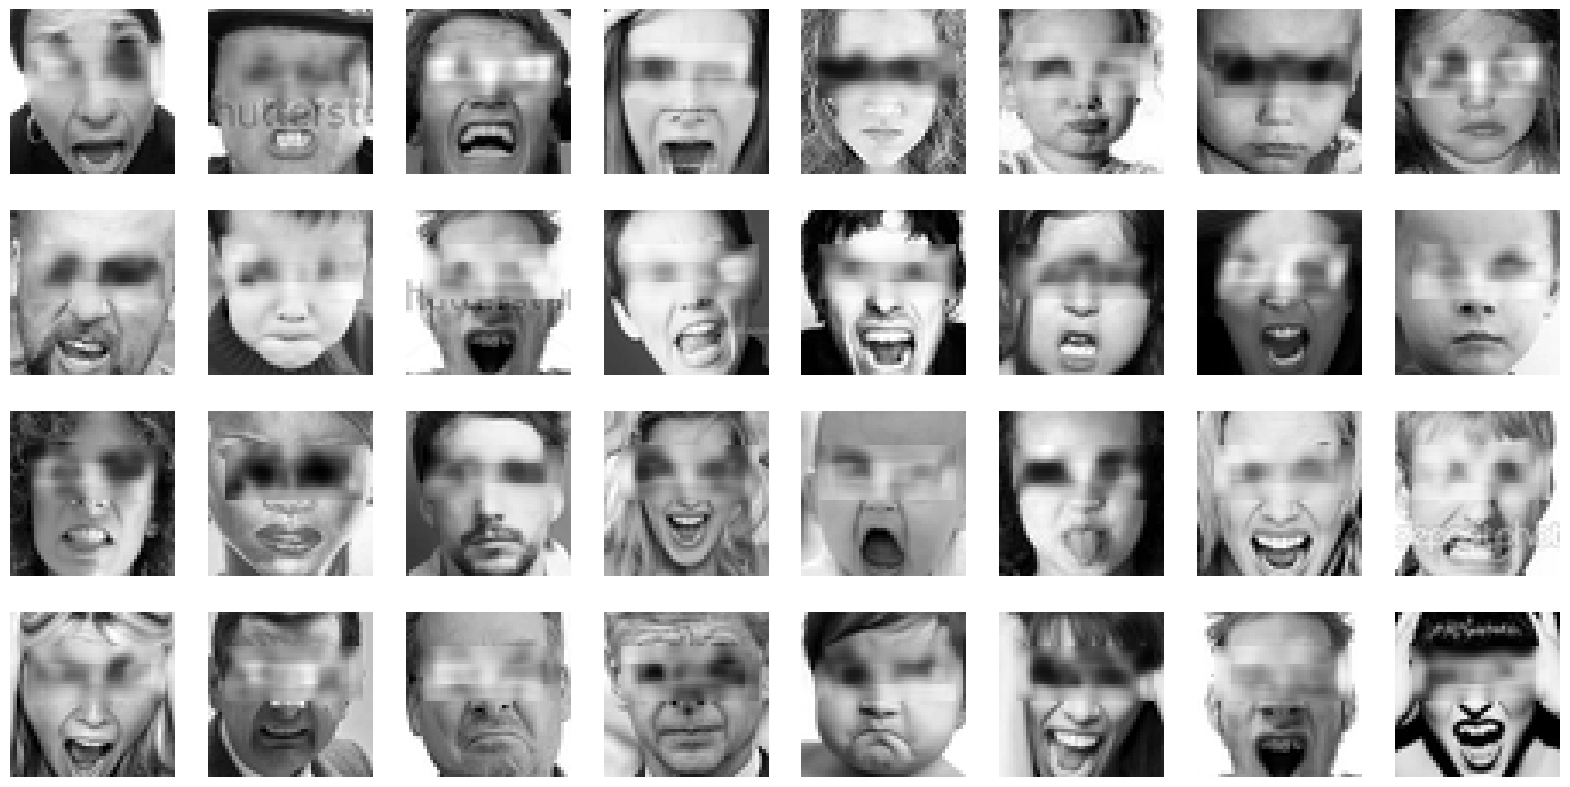

In [ ]:
setup_seed(42)

noise_dimension = param['noise_dimension']
noise_type = param['noise_type']
input_var = param['input_var']

z_demo = z_test[:32,:,:,:].clone()
x_demo = x_test[:32,:,:,:].clone()


Noise_fake = sample_noise(z_demo.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

model_k1.eval()
with torch.no_grad():
    z_demo_temp = model_k1.get_full_image(z_demo.to(device), Noise_fake.to(device))


# Plot the images
plot_images_from_tensor(z_demo_temp.cpu().detach())
# plot_images_from_tensor(output.cpu().detach())

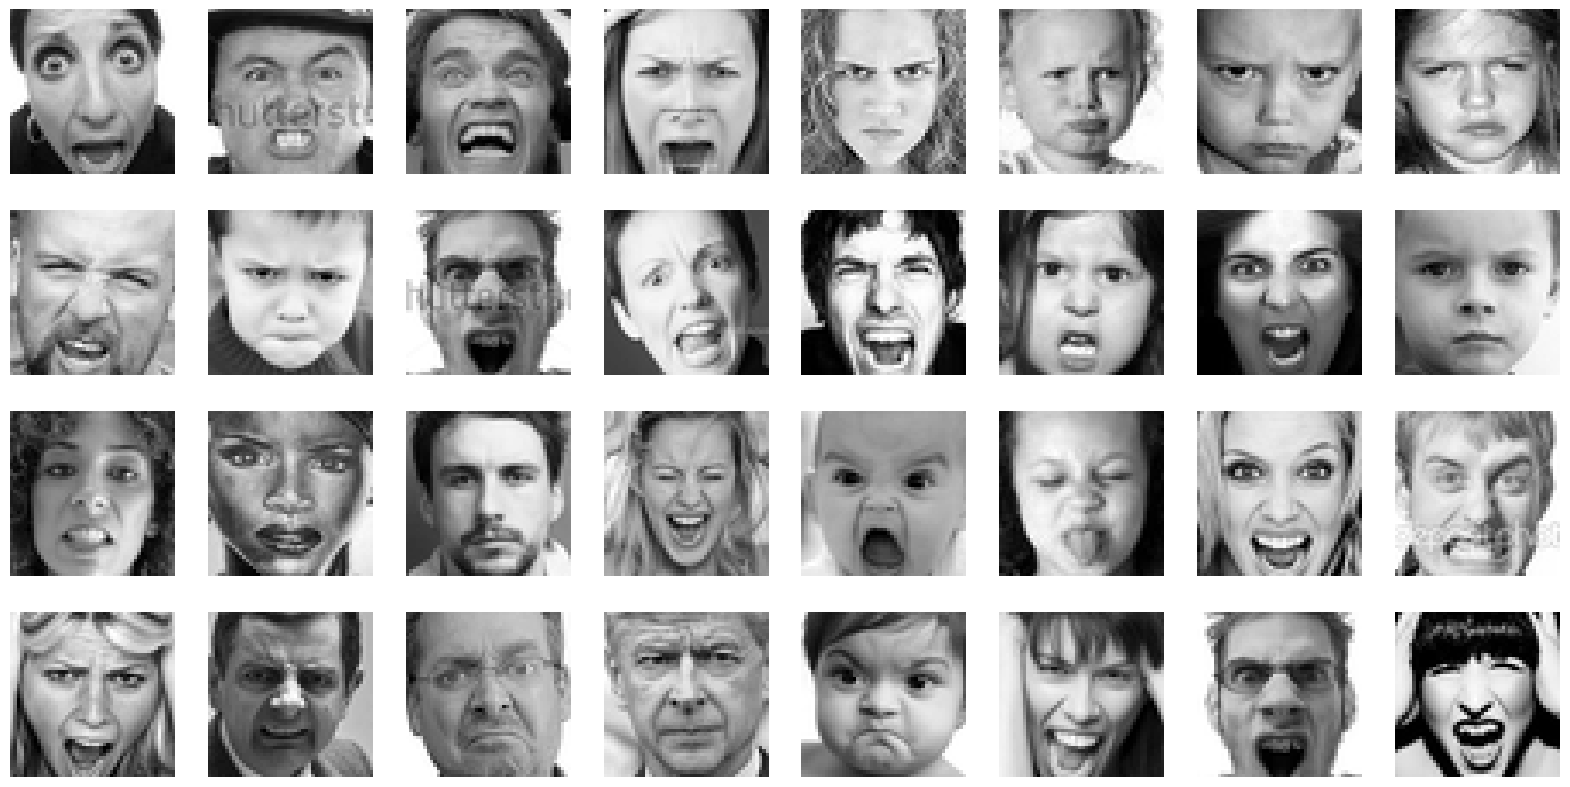

In [ ]:
# Plot the images
plot_images_from_tensor(x_demo.cpu().detach())

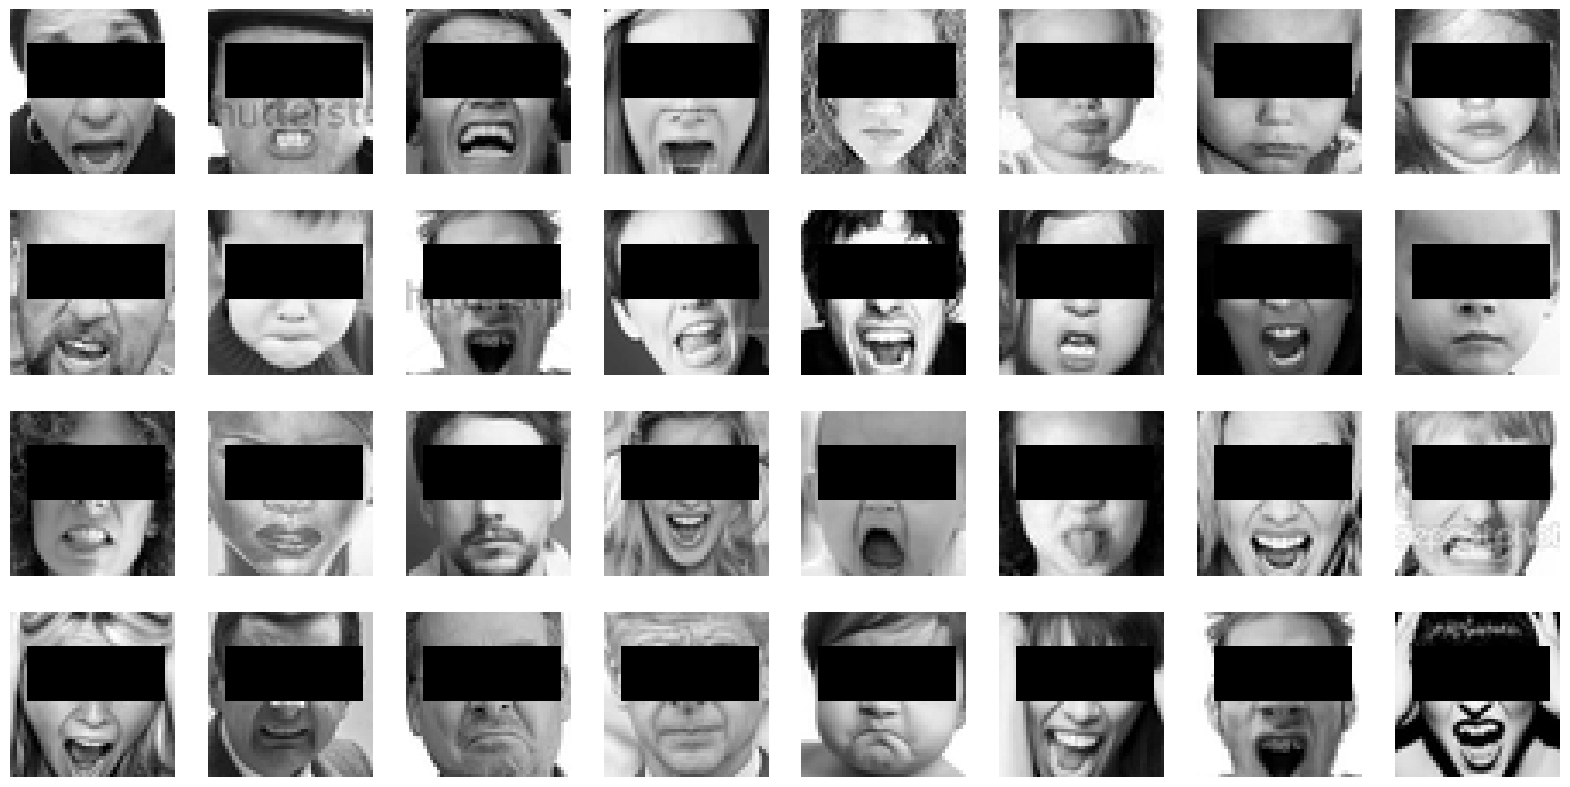

In [ ]:
# Plot the images
plot_images_from_tensor(z_demo.cpu().detach())

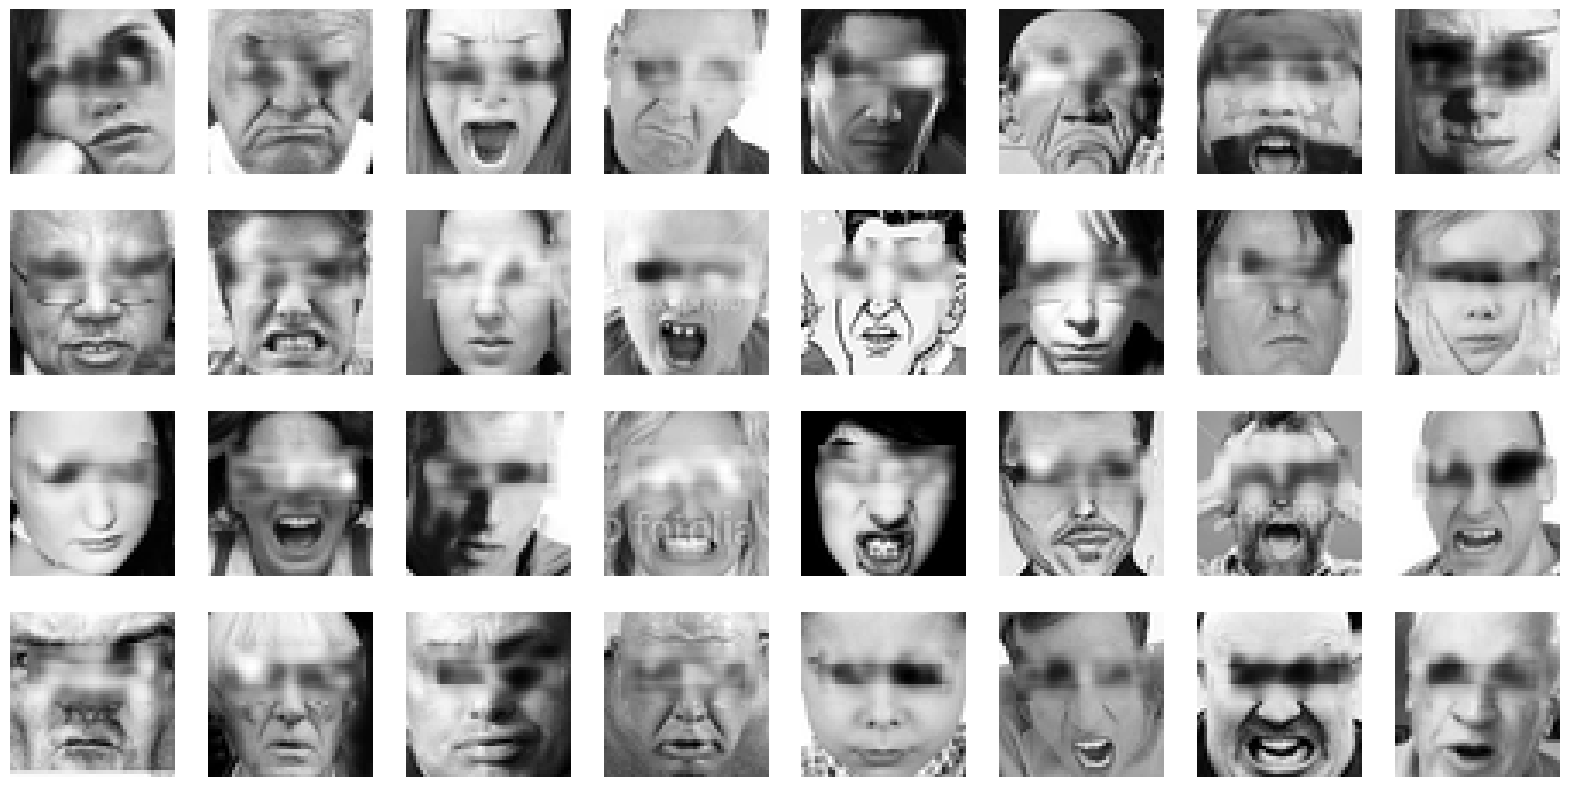

In [ ]:
setup_seed(42)

noise_dimension = param['noise_dimension']
noise_type = param['noise_type']
input_var = param['input_var']

z_demo = z_train[:32,:,:,:].clone()
x_demo = x_train[:32,:,:,:].clone()


Noise_fake = sample_noise(z_demo.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

model_k2.eval()
with torch.no_grad():
    z_demo_temp = model_k2.get_full_image(z_demo.to(device), Noise_fake.to(device))


# Plot the images
plot_images_from_tensor(z_demo_temp.cpu().detach())
# plot_images_from_tensor(output.cpu().detach())

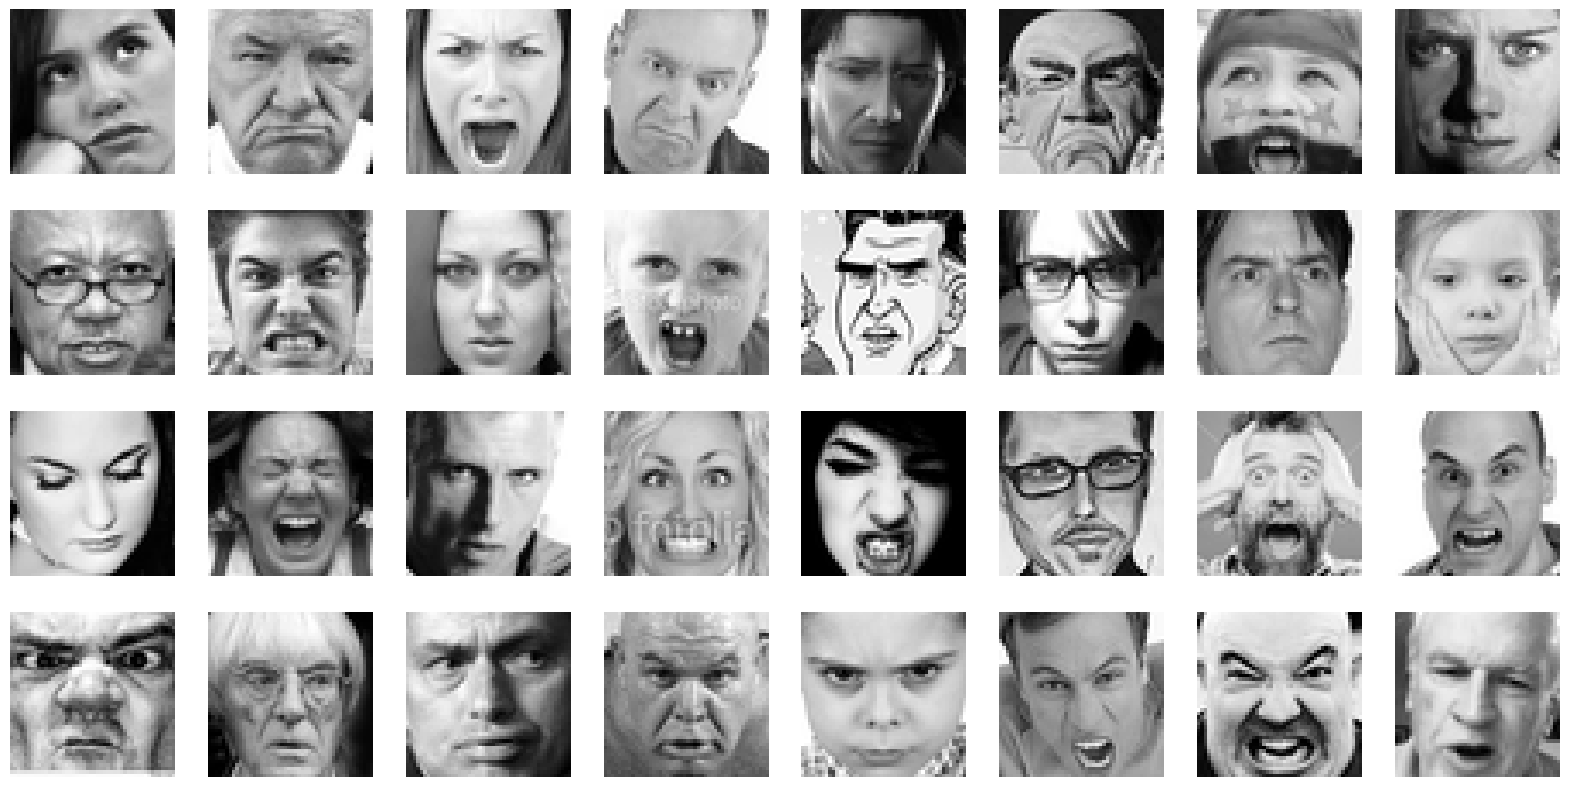

In [ ]:
# Plot the images
plot_images_from_tensor(x_demo.cpu().detach())

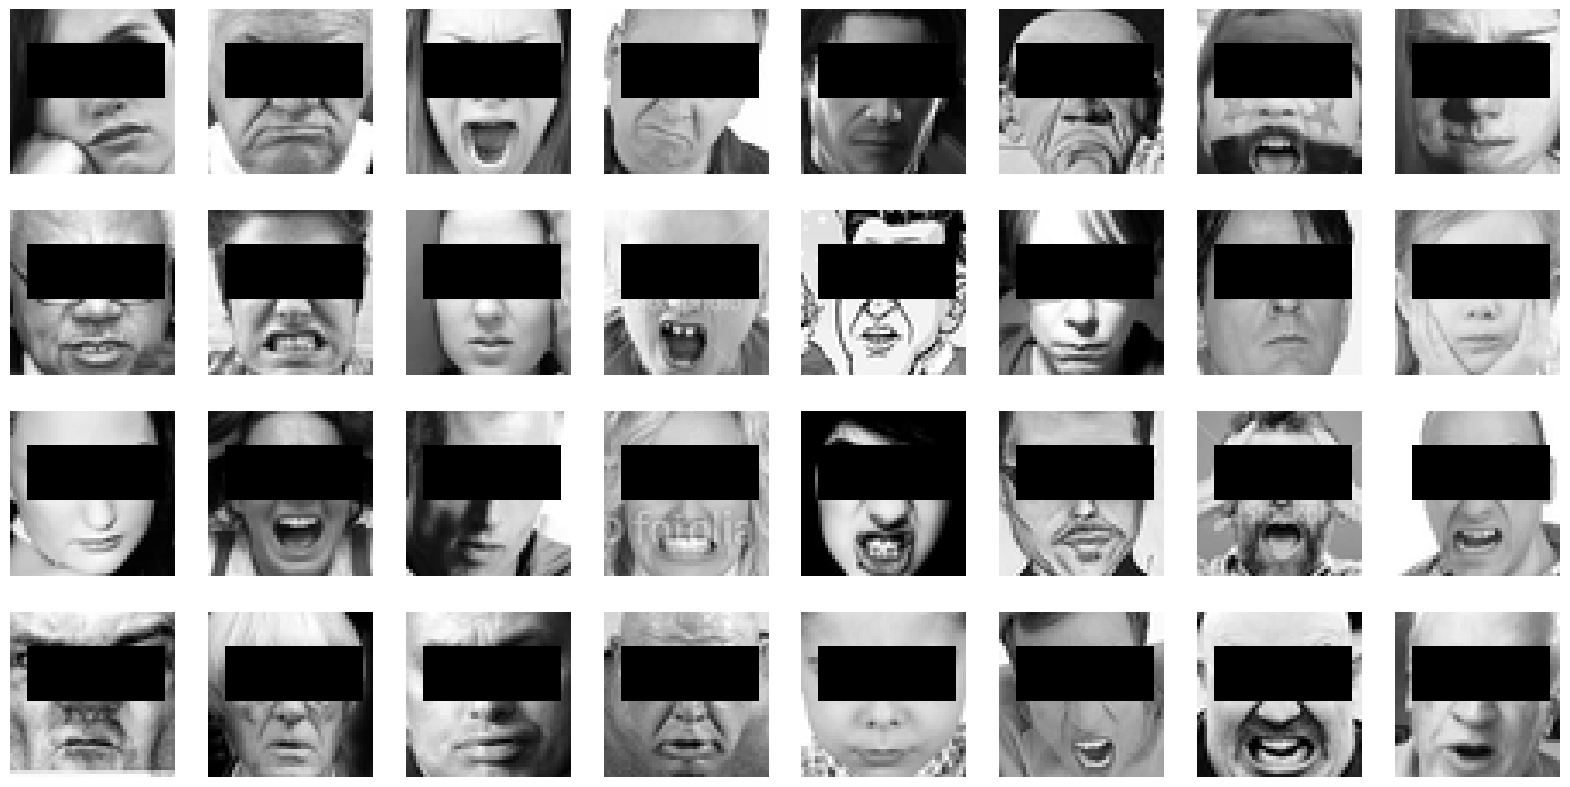

In [ ]:
# Plot the images
plot_images_from_tensor(z_demo.cpu().detach())

# Find p_val G Kernel, rademacher rv X Full

In [ ]:

def get_p_value_stat_g(boot_num, M, n, gen_x_all_torch, gen_y_all_torch, x_torch, y_torch, z_torch, boor_rv_type="gaussian", sigma_w=1.0, sigma_u=1.0):

    d_y = y_torch.shape[1]
    d_x = x_torch.shape[1]

    w_mx = torch.exp(-get_distance_matrix(z_torch, z_torch, 2) ** 2 / sigma_w)
    u_mx_1 = torch.exp(-get_distance_matrix(x_torch, x_torch, 2) ** 2 / sigma_u)
    u_mx_2 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], x_torch, 2) ** 2 / sigma_u)
    for i in range(1, M):
        u_mx_2 = u_mx_2 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], x_torch, 2) ** 2 / sigma_u)
    u_mx_2 = u_mx_2 / M

    u_mx_3 = u_mx_2.T
    u_mx_4 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], gen_x_all_torch[:,0,:], 2) ** 2 / sigma_u)
    for i in range(1, M):
        u_mx_4 = u_mx_4 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], gen_x_all_torch[:,i,:], 2) ** 2 / sigma_u)
    u_mx_4 = u_mx_4 / M

    u_mx = u_mx_1 - u_mx_2 - u_mx_3 + u_mx_4
    v_mx_temp = (gen_y_all_torch - y_torch)
    v_mx = torch.matmul(v_mx_temp, v_mx_temp.T)
    FF_mx = u_mx * v_mx * w_mx * (1 - torch.eye(n).to(device))

    stat = 1 / (n - 1) * torch.sum(FF_mx).item()

    boottemp = np.array([])
    if boor_rv_type == "rademacher":
        eboot = torch.sign(torch.randn(n, boot_num)).to(device)
    elif boor_rv_type == "gaussian":
        eboot = torch.randn(n, boot_num).to(device)
    for bb in range(boot_num):
        random_mx = torch.matmul(eboot[:, bb].reshape(-1, 1), eboot[:, bb].reshape(-1, 1).T)
        bootmatrix = FF_mx * random_mx
        stat_boot = 1 / (n - 1) * torch.sum(bootmatrix).item()
        boottemp = np.append(boottemp, stat_boot)
    return stat, boottemp

boot_num = 1000
M = 100

stat_list = np.zeros(2)
boot_stat_list = np.zeros((2, boot_num))

x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1).reshape(2000, -1).to(device)
z_temp = torch.cat((z_train.clone(), z_test.clone()), dim=1).reshape(2000, -1).to(device)

w_mx = get_distance_matrix(z_temp, z_temp, 2) ** 2
sigma_w = torch.median(w_mx).item() * 2

u_mx = get_distance_matrix(x_temp, x_temp, 2) ** 2
sigma_u = torch.median(u_mx).item() * 2

print(sigma_w)
print(sigma_u)

x_dims = 1*48*48
y_dims = 7
z_dim = 1*48*48
test_size = 1000
set_seed = param['set_seed']

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

gen_y_all = y_test_pred_prob
y_all= y_test_true_one_hot

test_data_zx = Data.TensorDataset(z_test, x_test)
test_loader_zx = Data.DataLoader(dataset=test_data_zx, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_k1.eval()
with torch.no_grad():
    for i, (batch_z, batch_x) in tqdm(enumerate(test_loader_zx)):
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_k1.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

cur_stat, cur_boot_temp = get_p_value_stat_g(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[0] = cur_stat
boot_stat_list[0, :] = cur_boot_temp

x_dims = 1*48*48
y_dims = 7
z_dim = 1*48*48
test_size = 1000

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

gen_y_all = y_train_pred_prob
y_all= y_train_true_one_hot

train_data_zx = Data.TensorDataset(z_train, x_train)
train_loader_zx = Data.DataLoader(dataset=train_data_zx, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_k2.eval()
with torch.no_grad():
    for i, (batch_z, batch_x) in tqdm(enumerate(train_loader_zx)):
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

cur_stat, cur_boot_temp = get_p_value_stat_g(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[1] = cur_stat
boot_stat_list[1, :] = cur_boot_temp

p_val = np.mean( np.mean(stat_list) < np.mean(boot_stat_list, axis=0) )
print(p_val)

p_val_1, p_val_2 = np.mean( stat_list[1] < boot_stat_list[1, :] ), np.mean( stat_list[0] < boot_stat_list[0, :] )
print(p_val_1)
print(p_val_2)

358.58355712890625
458.1028137207031


1000it [00:15, 64.21it/s]


torch.Size([1000, 100, 2304])
torch.Size([1000, 7])
torch.Size([1000, 2304])
torch.Size([1000, 2304])
torch.Size([1000, 7])


1000it [00:15, 66.57it/s]


torch.Size([1000, 100, 2304])
torch.Size([1000, 7])
torch.Size([1000, 2304])
torch.Size([1000, 2304])
torch.Size([1000, 7])
0.005
0.096
0.008


# Find p_val L Kernel, rademacher rv X Full

In [ ]:


boot_num = 1000
M = 100

stat_list = np.zeros(2)
boot_stat_list = np.zeros((2, boot_num))

x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1).reshape(2000, -1).to(device)
z_temp = torch.cat((z_train.clone(), z_test.clone()), dim=1).reshape(2000, -1).to(device)

w_mx = get_distance_matrix(z_temp, z_temp)
sigma_w = torch.median(w_mx).item()

u_mx = get_distance_matrix(x_temp, x_temp)
sigma_u = torch.median(u_mx).item()

print(sigma_w)
print(sigma_u)

x_dims = 1*48*48
y_dims = 7
z_dim = 1*48*48
test_size = 1000
set_seed = param['set_seed']

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

gen_y_all = y_test_pred_prob
y_all= y_test_true_one_hot

test_data_zx = Data.TensorDataset(z_test, x_test)
test_loader_zx = Data.DataLoader(dataset=test_data_zx, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_k1.eval()
with torch.no_grad():
    for i, (batch_z, batch_x) in tqdm(enumerate(test_loader_zx)):
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_k1.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

cur_stat, cur_boot_temp = get_p_value_stat(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[0] = cur_stat
boot_stat_list[0, :] = cur_boot_temp

x_dims = 1*48*48
y_dims = 7
z_dim = 1*48*48
test_size = 1000

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

gen_y_all = y_train_pred_prob
y_all= y_train_true_one_hot

train_data_zx = Data.TensorDataset(z_train, x_train)
train_loader_zx = Data.DataLoader(dataset=train_data_zx, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_k2.eval()
with torch.no_grad():
    for i, (batch_z, batch_x) in tqdm(enumerate(train_loader_zx)):
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_k2.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

cur_stat, cur_boot_temp = get_p_value_stat(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[1] = cur_stat
boot_stat_list[1, :] = cur_boot_temp

p_val = np.mean( np.mean(stat_list) < np.mean(boot_stat_list, axis=0) )
print(p_val)

p_val_1, p_val_2 = np.mean( stat_list[1] < boot_stat_list[1, :] ), np.mean( stat_list[0] < boot_stat_list[0, :] )
print(p_val_1)
print(p_val_2)

440.0235595703125
582.6744995117188


1000it [00:15, 64.96it/s]


torch.Size([1000, 100, 2304])
torch.Size([1000, 7])
torch.Size([1000, 2304])
torch.Size([1000, 2304])
torch.Size([1000, 7])


1000it [00:15, 65.97it/s]


torch.Size([1000, 100, 2304])
torch.Size([1000, 7])
torch.Size([1000, 2304])
torch.Size([1000, 2304])
torch.Size([1000, 7])
0.0
0.015
0.002


In [ ]:
region1 = regions[0]

region1_height = region1[1] - region1[0]
region1_width = region1[3] - region1[2]

# Find p_val G Kernel, rademacher rv X sub

In [ ]:

def get_p_value_stat_g(boot_num, M, n, gen_x_all_torch, gen_y_all_torch, x_torch, y_torch, z_torch, boor_rv_type="gaussian", sigma_w=1.0, sigma_u=1.0):

    d_y = y_torch.shape[1]
    d_x = x_torch.shape[1]

    w_mx = torch.exp(-get_distance_matrix(z_torch, z_torch, 2) ** 2 / sigma_w)
    u_mx_1 = torch.exp(-get_distance_matrix(x_torch, x_torch, 2) ** 2 / sigma_u)
    u_mx_2 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], x_torch, 2) ** 2 / sigma_u)
    for i in range(1, M):
        u_mx_2 = u_mx_2 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], x_torch, 2) ** 2 / sigma_u)
    u_mx_2 = u_mx_2 / M

    u_mx_3 = u_mx_2.T
    u_mx_4 = torch.exp(-get_distance_matrix(gen_x_all_torch[:,0,:], gen_x_all_torch[:,0,:], 2) ** 2 / sigma_u)
    for i in range(1, M):
        u_mx_4 = u_mx_4 + torch.exp(-get_distance_matrix(gen_x_all_torch[:,i,:], gen_x_all_torch[:,i,:], 2) ** 2 / sigma_u)
    u_mx_4 = u_mx_4 / M

    u_mx = u_mx_1 - u_mx_2 - u_mx_3 + u_mx_4
    v_mx_temp = (gen_y_all_torch - y_torch)
    v_mx = torch.matmul(v_mx_temp, v_mx_temp.T)
    FF_mx = u_mx * v_mx * w_mx * (1 - torch.eye(n).to(device))

    stat = 1 / (n - 1) * torch.sum(FF_mx).item()

    boottemp = np.array([])
    if boor_rv_type == "rademacher":
        eboot = torch.sign(torch.randn(n, boot_num)).to(device)
    elif boor_rv_type == "gaussian":
        eboot = torch.randn(n, boot_num).to(device)
    for bb in range(boot_num):
        random_mx = torch.matmul(eboot[:, bb].reshape(-1, 1), eboot[:, bb].reshape(-1, 1).T)
        bootmatrix = FF_mx * random_mx
        stat_boot = 1 / (n - 1) * torch.sum(bootmatrix).item()
        boottemp = np.append(boottemp, stat_boot)
    return stat, boottemp

boot_num = 1000
M = 100

stat_list = np.zeros(2)
boot_stat_list = np.zeros((2, boot_num))

# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1).reshape(2000, -1).to(device)
# z_temp = torch.cat((z_train.clone(), z_test.clone()), dim=1).reshape(2000, -1).to(device)

# w_mx = get_distance_matrix(z_temp, z_temp, 2) ** 2
# sigma_w = torch.median(w_mx).item() * 2

# u_mx = get_distance_matrix(x_temp, x_temp, 2) ** 2
# sigma_u = torch.median(u_mx).item() * 2

# print(sigma_w)
# print(sigma_u)

x_dims = 1*region1_height*region1_width
y_dims = 7
z_dim = 1*48*48
test_size = 1000
set_seed = param['set_seed']

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

gen_y_all = y_test_pred_prob
y_all= y_test_true_one_hot

test_data_zx = Data.TensorDataset(z_test, x_test)
test_loader_zx = Data.DataLoader(dataset=test_data_zx, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_k1.eval()
with torch.no_grad():
    for i, (batch_z, batch_x) in tqdm(enumerate(test_loader_zx)):
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_k1.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output[:, :, region1[0]:region1[1], region1[2]:region1[3]]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        batch_x = batch_x[:, :, region1[0]:region1[1], region1[2]:region1[3]]
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

w_mx = get_distance_matrix(z_all, z_all, 2) ** 2
sigma_w = torch.median(w_mx).item() * 2

u_mx = get_distance_matrix(x_all, x_all, 2) ** 2
sigma_u = torch.median(u_mx).item() * 2

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat_g(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[0] = cur_stat
boot_stat_list[0, :] = cur_boot_temp

x_dims = 1*region1_height*region1_width
y_dims = 7
z_dim = 1*48*48
test_size = 1000

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

gen_y_all = y_train_pred_prob
y_all= y_train_true_one_hot

train_data_zx = Data.TensorDataset(z_train, x_train)
train_loader_zx = Data.DataLoader(dataset=train_data_zx, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_k2.eval()
with torch.no_grad():
    for i, (batch_z, batch_x) in tqdm(enumerate(train_loader_zx)):
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_k1.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output[:, :, region1[0]:region1[1], region1[2]:region1[3]]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        batch_x = batch_x[:, :, region1[0]:region1[1], region1[2]:region1[3]]
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

w_mx = get_distance_matrix(z_all, z_all, 2) ** 2
sigma_w = torch.median(w_mx).item() * 2

u_mx = get_distance_matrix(x_all, x_all, 2) ** 2
sigma_u = torch.median(u_mx).item() * 2

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat_g(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[1] = cur_stat
boot_stat_list[1, :] = cur_boot_temp

p_val = np.mean( np.mean(stat_list) < np.mean(boot_stat_list, axis=0) )
print(p_val)

p_val_1, p_val_2 = np.mean( stat_list[1] < boot_stat_list[1, :] ), np.mean( stat_list[0] < boot_stat_list[0, :] )
print(p_val_1)
print(p_val_2)

1000it [00:15, 66.33it/s]


torch.Size([1000, 100, 640])
torch.Size([1000, 7])
torch.Size([1000, 2304])
torch.Size([1000, 640])
torch.Size([1000, 7])
356.2851257324219
92.66722869873047


1000it [00:14, 67.68it/s]


torch.Size([1000, 100, 640])
torch.Size([1000, 7])
torch.Size([1000, 2304])
torch.Size([1000, 640])
torch.Size([1000, 7])
360.85302734375
95.05022430419922
0.004
0.078
0.013


# Find p_val L Kernel, rademacher rv X sub

In [ ]:
boot_num = 1000
M = 100

stat_list = np.zeros(2)
boot_stat_list = np.zeros((2, boot_num))

# x_temp = torch.cat((x_train.clone(), x_test.clone()), dim=1).reshape(2000, -1).to(device)
# z_temp = torch.cat((z_train.clone(), z_test.clone()), dim=1).reshape(2000, -1).to(device)

# w_mx = get_distance_matrix(z_temp, z_temp, 2) ** 2
# sigma_w = torch.median(w_mx).item() * 2

# u_mx = get_distance_matrix(x_temp, x_temp, 2) ** 2
# sigma_u = torch.median(u_mx).item() * 2

# print(sigma_w)
# print(sigma_u)

x_dims = 1*region1_height*region1_width
y_dims = 7
z_dim = 1*48*48
test_size = 1000
set_seed = param['set_seed']

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

gen_y_all = y_test_pred_prob
y_all= y_test_true_one_hot

test_data_zx = Data.TensorDataset(z_test, x_test)
test_loader_zx = Data.DataLoader(dataset=test_data_zx, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_k1.eval()
with torch.no_grad():
    for i, (batch_z, batch_x) in tqdm(enumerate(test_loader_zx)):
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_k1.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output[:, :, region1[0]:region1[1], region1[2]:region1[3]]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        batch_x = batch_x[:, :, region1[0]:region1[1], region1[2]:region1[3]]
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

w_mx = get_distance_matrix(z_all, z_all)
sigma_w = torch.median(w_mx).item()

u_mx = get_distance_matrix(x_all, x_all)
sigma_u = torch.median(u_mx).item()

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[0] = cur_stat
boot_stat_list[0, :] = cur_boot_temp

x_dims = 1*region1_height*region1_width
y_dims = 7
z_dim = 1*48*48
test_size = 1000

gen_x_all = torch.zeros(test_size, M, x_dims)
gen_y_all = torch.zeros(test_size, y_dims)
z_all = torch.zeros(test_size, z_dim)
x_all = torch.zeros(test_size, x_dims)
y_all = torch.zeros(test_size, y_dims)

gen_y_all = y_train_pred_prob
y_all= y_train_true_one_hot

train_data_zx = Data.TensorDataset(z_train, x_train)
train_loader_zx = Data.DataLoader(dataset=train_data_zx, batch_size=1, shuffle=False)

setup_seed(set_seed)

model_k2.eval()
with torch.no_grad():
    for i, (batch_z, batch_x) in tqdm(enumerate(train_loader_zx)):
        batch_z = batch_z.to(device)
        z_all[i, :] = batch_z.reshape(1, -1)

        repeat_dims = (M, 1, 1, 1)
        Z_real_repeat = batch_z.repeat(*repeat_dims).to(device)

        Noise_fake = sample_noise(Z_real_repeat.shape[0], noise_dimension, noise_type, input_var = input_var).to(device)

        output = model_k1.get_full_image(Z_real_repeat.to(device), Noise_fake.to(device))
        output = output[:, :, region1[0]:region1[1], region1[2]:region1[3]]
        output = output.reshape(M, 1, output.shape[1], output.shape[2], output.shape[3]).swapaxes(0, 1)

        X_fake = output.reshape(M, -1).to(device)


        gen_x_all[i, :, :] = X_fake
        batch_x = batch_x[:, :, region1[0]:region1[1], region1[2]:region1[3]]
        x_all[i, :] = batch_x.reshape(1, -1)

print(gen_x_all.shape)
print(gen_y_all.shape)
print(z_all.shape)
print(x_all.shape)
print(y_all.shape)

w_mx = get_distance_matrix(z_all, z_all)
sigma_w = torch.median(w_mx).item()

u_mx = get_distance_matrix(x_all, x_all)
sigma_u = torch.median(u_mx).item()

print(sigma_w)
print(sigma_u)

cur_stat, cur_boot_temp = get_p_value_stat(boot_num, M, test_size, gen_x_all.to(device), gen_y_all.to(device),
                    x_all.to(device), y_all.to(device), z_all.to(device), 'rademacher', sigma_w, sigma_u)

stat_list[1] = cur_stat
boot_stat_list[1, :] = cur_boot_temp

p_val = np.mean( np.mean(stat_list) < np.mean(boot_stat_list, axis=0) )
print(p_val)

p_val_1, p_val_2 = np.mean( stat_list[1] < boot_stat_list[1, :] ), np.mean( stat_list[0] < boot_stat_list[0, :] )
print(p_val_1)
print(p_val_2)

1000it [00:14, 67.79it/s]


torch.Size([1000, 100, 640])
torch.Size([1000, 7])
torch.Size([1000, 2304])
torch.Size([1000, 640])
torch.Size([1000, 7])
438.099365234375
139.5448760986328


1000it [00:14, 67.51it/s]


torch.Size([1000, 100, 640])
torch.Size([1000, 7])
torch.Size([1000, 2304])
torch.Size([1000, 640])
torch.Size([1000, 7])
441.8067626953125
141.6075897216797
0.0
0.019
0.004
